<a href="https://colab.research.google.com/github/benjaminbrown038/ECSE-6410-Pattern-Recognition-HW1/blob/main/ECSE_6410_Pattern_Recognition_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Classify Cats and Dogs


# Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import zipfile

In [29]:
import tensorflow as tf
import os
import zipfile

# 1. Download dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url)

# 2. Extract manually (sometimes extract=True fails in Colab)
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(path_to_zip))

# 3. Build dataset paths
base_dir = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

print("Base dir:", base_dir)
print("Train dir:", train_dir, " -> exists?", os.path.exists(train_dir))
print("Validation dir:", validation_dir, " -> exists?", os.path.exists(validation_dir))



Base dir: /root/.keras/datasets/cats_and_dogs_filtered
Train dir: /root/.keras/datasets/cats_and_dogs_filtered/train  -> exists? True
Validation dir: /root/.keras/datasets/cats_and_dogs_filtered/validation  -> exists? True


# Data




In [2]:
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"


In [3]:
path = tf.keras.utils.get_file("cats_and_dogs.zip", origin=url, extract=True)


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
path

'/root/.keras/datasets/cats_and_dogs_extracted'

In [5]:
base_dir = os.path.join(os.path.dirname(path), 'cats_and_dogs_filtered')


In [6]:
base_dir

'/root/.keras/datasets/cats_and_dogs_filtered'

In [8]:
train_dir = os.path.join(base_dir, 'train')


'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [27]:
type(train_dir)

str

In [9]:
val_dir   = os.path.join(base_dir, 'validation')
val_dir

'/root/.keras/datasets/cats_and_dogs_filtered/validation'

In [10]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [11]:
url

'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [12]:
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
path_to_zip

'/root/.keras/datasets/cats_and_dogs_filtered_extracted'

In [14]:
train_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered', 'train')


In [22]:
train_dir = os.path.join(base_dir, "train")
print("Train directory:", train_dir)

Train directory: /root/.keras/datasets/cats_and_dogs_filtered/train


In [15]:
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train'

In [17]:
print(f"Train directory: {train_dir}")

Train directory: /root/.keras/datasets/cats_and_dogs_filtered/train


In [18]:
img_size = (150, 150)

In [19]:
img_size

(150, 150)

In [ ]:
batch_size = 32

In [20]:
batch_size

32

In [30]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,   # optional split within training set
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [31]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size=img_size,
    batch_size=batch_size
)

Found 1000 files belonging to 2 classes.


In [32]:
# Improve performance with prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
# -----------------------------
# 3. Data Augmentation Layer
# -----------------------------
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),])


# Model



In [34]:
# -----------------------------
# 4. Define CNN Model
# -----------------------------
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255, input_shape=(150, 150, 3)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# -----------------------------
# 5. Compile Model
# -----------------------------
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
# -----------------------------
# 6. Train Model
# -----------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5105 - loss: 0.7101 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5248 - loss: 0.6894 - val_accuracy: 0.5620 - val_loss: 0.6838
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5824 - loss: 0.6792 - val_accuracy: 0.6250 - val_loss: 0.6514
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6217 - loss: 0.6656 - val_accuracy: 0.6480 - val_loss: 0.6452
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5954 - loss: 0.6586 - val_accuracy: 0.6330 - val_loss: 0.6584
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6403 - loss: 0.6523 - val_accuracy: 0.6510 - val_loss: 0.6442
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6601 - loss: 0.6162 - val_accuracy: 0.6580 - val_loss: 0.6250
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6567 - loss: 0.6205 - val_accuracy: 0.6550 - val_loss:

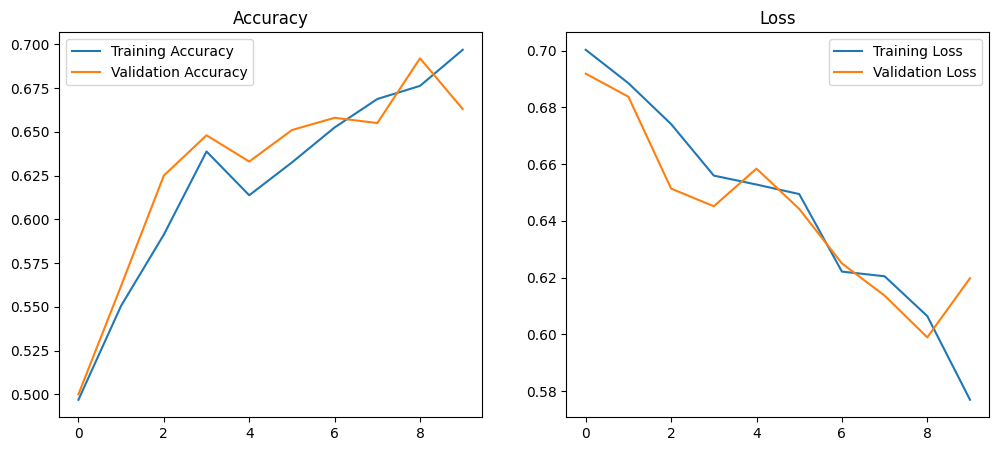

In [37]:
# -----------------------------
# 7. Plot Training Results
# -----------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss")
plt.show()

### Dataset Reference

1. https://www.kaggle.com/c/dogs-vs-cats/data